## MNIST Dataset Review

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
print(type(mnist))

<class 'module'>


In [4]:
# mnist dataset is already splitted
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# each image is 28 x 28 pixels
single_image = X_train[0]
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

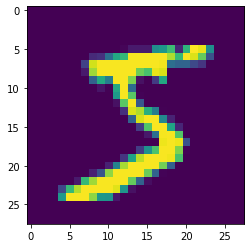

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# multiclass classifications need to be one-hot encoded

from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_cat_train = to_categorical(y_train)
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# put 10 to num_classes just in case if there's any missing values
y_cat_test = to_categorical(y_test, num_classes= 10)

In [14]:
y_cat_test.shape

(10000, 10)

In [15]:
single_image.min(), single_image.max()

(0, 255)

In [16]:
# to make sure not to run into gradient problems, scale
#  only fit on the training data because we don't wanna prior knowledge to test data


In [17]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
scaled_image = X_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

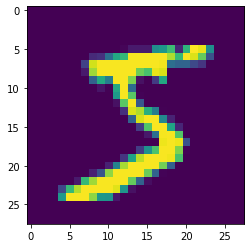

In [19]:
plt.imshow(scaled_image)

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
# batch_size, width, height, color_channels

X_train = X_train.reshape(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (4, 4), input_shape= (28, 28, 1), 
                 activation= "relu"))
model.add(MaxPool2D(pool_size= (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))

# multiclass problem --> softmax
model.add(Dense(10, activation= "softmax"))

Metal device set to: Apple M1


2022-07-15 21:44:19.188525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 21:44:19.188612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.compile(loss= "categorical_crossentropy", optimizer= "adam", 
             metrics= ["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor= "val_loss", patience= 2)

In [29]:
model.fit(X_train, y_cat_train, epochs= 10, validation_data = (X_test, y_cat_test), 
         callbacks= [early_stop])

Epoch 1/10


2022-07-15 21:44:19.338659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-15 21:44:19.338849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 21:44:19.446774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.1486 - accuracy: 0.9551

2022-07-15 21:44:34.438467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 9ms/step - loss: 0.1486 - accuracy: 0.9551 - val_loss: 0.0553 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0408 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0427 - val_accuracy: 0.9

In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.148590,0.955067,0.055282,0.9844
1,0.048333,0.985217,0.052808,0.9827
2,0.031161,0.990067,0.040811,0.9871
3,0.021477,0.993150,0.039703,0.9881
4,0.014393,0.995583,0.035610,0.9885
5,0.010327,0.996833,0.048551,0.9857
6,0.008947,0.997150,0.042733,0.9890


<AxesSubplot:>

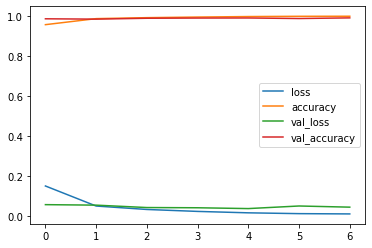

In [32]:
metrics.plot()

<AxesSubplot:>

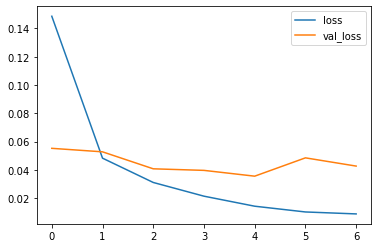

In [33]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

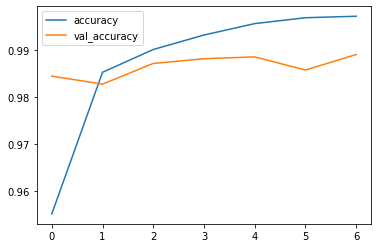

In [34]:
metrics[["accuracy", "val_accuracy"]].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(X_test, y_cat_test, verbose= 1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0427 - accuracy: 0.9890


[0.04273305460810661, 0.9890000224113464]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_pred = model.predict_classes(X_test)

In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
y_pred[0]

7

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
confusion_matrix(y_test, y_pred)

array([[ 977,    0,    0,    1,    0,    0,    0,    0,    2,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    2, 1025,    1,    0,    0,    0,    3,    1,    0],
       [   0,    0,    1, 1005,    0,    1,    0,    0,    2,    1],
       [   0,    0,    4,    0,  971,    0,    0,    0,    0,    7],
       [   1,    1,    0,    9,    0,  877,    3,    0,    1,    0],
       [   5,    2,    1,    0,    1,    1,  944,    0,    4,    0],
       [   1,    3,   10,    0,    0,    1,    0, 1007,    1,    5],
       [   4,    1,    2,    1,    0,    1,    1,    2,  960,    2],
       [   1,    2,    0,    3,    5,    3,    0,    2,    4,  989]])

In [47]:
import seaborn as sns

<AxesSubplot:>

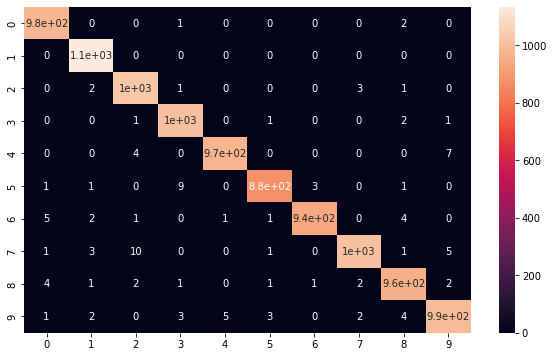

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

## Predicting an Image

In [50]:
my_number = X_test[0]

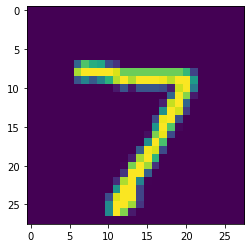

In [51]:
plt.imshow(my_number.reshape(28,28))

In [52]:
model.predict_classes(my_number.reshape(1,28,28,1))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

# :D